# PDAN8411

ST10117137 (Kashik Ramnath)

Task 1 - 2023 - Semester 1

# Dataset Reference

'Real estate price prediction'

by: ALGOR_BRUCE

Kaggle (2023)

[Online] https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction

# What is linear regression?
Linear regression is a basic algorithm in predictive analysis. During regression what is to be analyzed is if the independent variables (X values) accurately predict the dependent variable (Y values), and which of the independent variables are most meaningful in the prediction of the dependant variable (including in what way are they important). The relationship, visualisation or prediction between the dependent variable and 1 or more independent variables are explained through the regression estimates (Statistics Solutions, 2023).

According to Unite (2023), 'As the independent variable is adjusted, the levels of the dependent variable will fluctuate. The dependent variable is the variable that is being studied, and it is what the regression model solves for/attempts to predict. In linear regression tasks, every observation/instance is comprised of both the dependent variable value and the independent variable value'.

There are various forms of linear regression:
- Simple linear regression
- Multiple  linear regression
- Logistic regression
- Ordinal regression
- Multinomial regression
- Discriminant analysis

However, for this task, 'multiple linear regression' will be used as the dataset features multiple independent variables (X values) which is used to predict the dependent variable (Y outcome).

# Why this dataset is suitable for linear regerssion and what analysis will be conducted?

Linear regression as a whole is used for the finding of relationships between a target and 1 or more predictors, which is exactly what is being done in this dataset; there are several x values - in which it needs to be analysed which of the x values effects the outcome. After removing unnecessary x values, they can be used to build a model to predict the Y value. Linear is also appropriate as the relationships are statistical and not deterministic (Towards Data Science, 2023).
Linear regression has its historical foundation in finance, business, marketing, etc, and is therefore suitable as the used dataset is based upon real estate and is falls under these categroies. The dataset has predictors that are independent which makes linear aggression appropriate. The dataset is also not too small for linear regession to not be am effective method; nor is it too complex.

Multiple linear regression will be used as the dataset features multiple independent variables which is used to investigate:
- the strength of the relationship between 2 or more independent variables and 1 dependent variable, 
- as well as accurately predict the dependent variable when given certain independent variables (Scribbr, 2023).

This is fitting as what will be done with this 'Real estate.csv' dataset is; evaluating the relationships of the 6 independent variables and the dependent variable to train a model to precisely predict the dependent variables (House price of unit area) with any given independent values. 

Each x value will be evaluated to see their relevence/significance in the dataset using correlations. Those with correlations that are too low will be exempt from the dataset and model making process. The model will then me made and tested in the prediction of the outcome while avoiding underfitting and overfitting.

This follows the formula of:

# y = m1 x1 + m2 x2 + m3 x3 + b

- In this formula y indicates the dependent variable, in the case of the dataset, Unit Area House Price
- m1 to m3 Are the coefficients (slope; the values that multiply the predictor vales)
- x1 to x3 Are the independent variables, namely, transaction date, house age, distance to enarest MRT station, number of convenience stores, longitude, and lattitude (the dataset will be later analysed to find out if all the supposed x values are actually significant in calculating the outcome, therefore the formula may change in number of independant variables and coefficients used)
- b is the intercept

Therefore the formula should follow along the lines of:

# price = m1 * date + m2 * age + m3 * MRT + m4 * stores + m5 * latitude + m6 * longitude + b

# References
Statistics Solutions. 2023. What is Linear Regression? n.d. [Online]. Available at: https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-linear-regression/#:~:text=What%20is%20Linear%20Regression%3F%20Linear%20regression%20is%20a,good%20job%20in%20predicting%20an%20outcome%20%28dependent%29%20variable%3F [Accessed 21 April 2023].

Unite. 2023. What is Linear Regression? 5 June 2021. [Online]. Available at: https://www.unite.ai/what-is-linear-regression/ [Accessed 21 April 2023].

Towards Data Science. 2023. Linear Regression - Detailed View. 26 February 2018. [Online]. Available at: https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86#:~:text=Simple%20linear%20regression%20is%20useful,relationship%20but%20not%20deterministic%20relationship [Accessed 21 April 2023].

Scribbr. 2023. Multiple Linear Regression | A Quick Guide (Examples). 20 February 2020. [Online]. Available at: https://www.scribbr.com/statistics/multiple-linear-regression/#:~:text=You%20can%20use%20multiple%20linear,fertilizer%20added%20affect%20crop%20growth [Accessed 21 April 2023].

In [399]:
# imports essential libraries and tools for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [400]:
# reads the .csv file named 'Real estate'
RealEstate = pd.read_csv('Real estate.csv')

# prints the 5 head and 5 tail values of the dataset
RealEstate

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [401]:
# tells us how bug the dataset is; 
# in this case, it is relatively small
RealEstate.shape

(414, 8)

In [402]:
# prvides insight on the dataset
RealEstate.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [403]:
# ensures the data-types in the db are useable
RealEstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [404]:
# shows the number of unique values in the db
RealEstate.nunique(axis=0)

No                                        414
X1 transaction date                        12
X2 house age                              236
X3 distance to the nearest MRT station    259
X4 number of convenience stores            11
X5 latitude                               234
X6 longitude                              232
Y house price of unit area                270
dtype: int64

In [405]:
# shows the number of missing or null values in the db; 
# in this case there are none
RealEstate.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [406]:
RealEstate.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [407]:
# shows the correlation between each column of the dataframe
# assess possible linear association between variables
RealEstate.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [408]:
# the No column is just a numbering system
# we remove it as it is unnecessary
RealEstate = RealEstate.drop(['No'], axis = 1)
RealEstate

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [409]:
# the naming system in innefficient
# we therefore rename them
RealEstate = RealEstate.rename(columns = {"X1 transaction date":"transaction_date", 
                         "X2 house age": "house_age",
                         "X3 distance to the nearest MRT station": "distance_MRT_station",
                         "X4 number of convenience stores":"num_conv_stores",
                         "X5 latitude": "latitude",
                         "X6 longitude": "longitude",
                         "Y house price of unit area":"price_perunit_area" })
RealEstate

,transaction_date,house_age,distance_MRT_station,num_conv_stores,latitude,longitude,price_perunit_area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


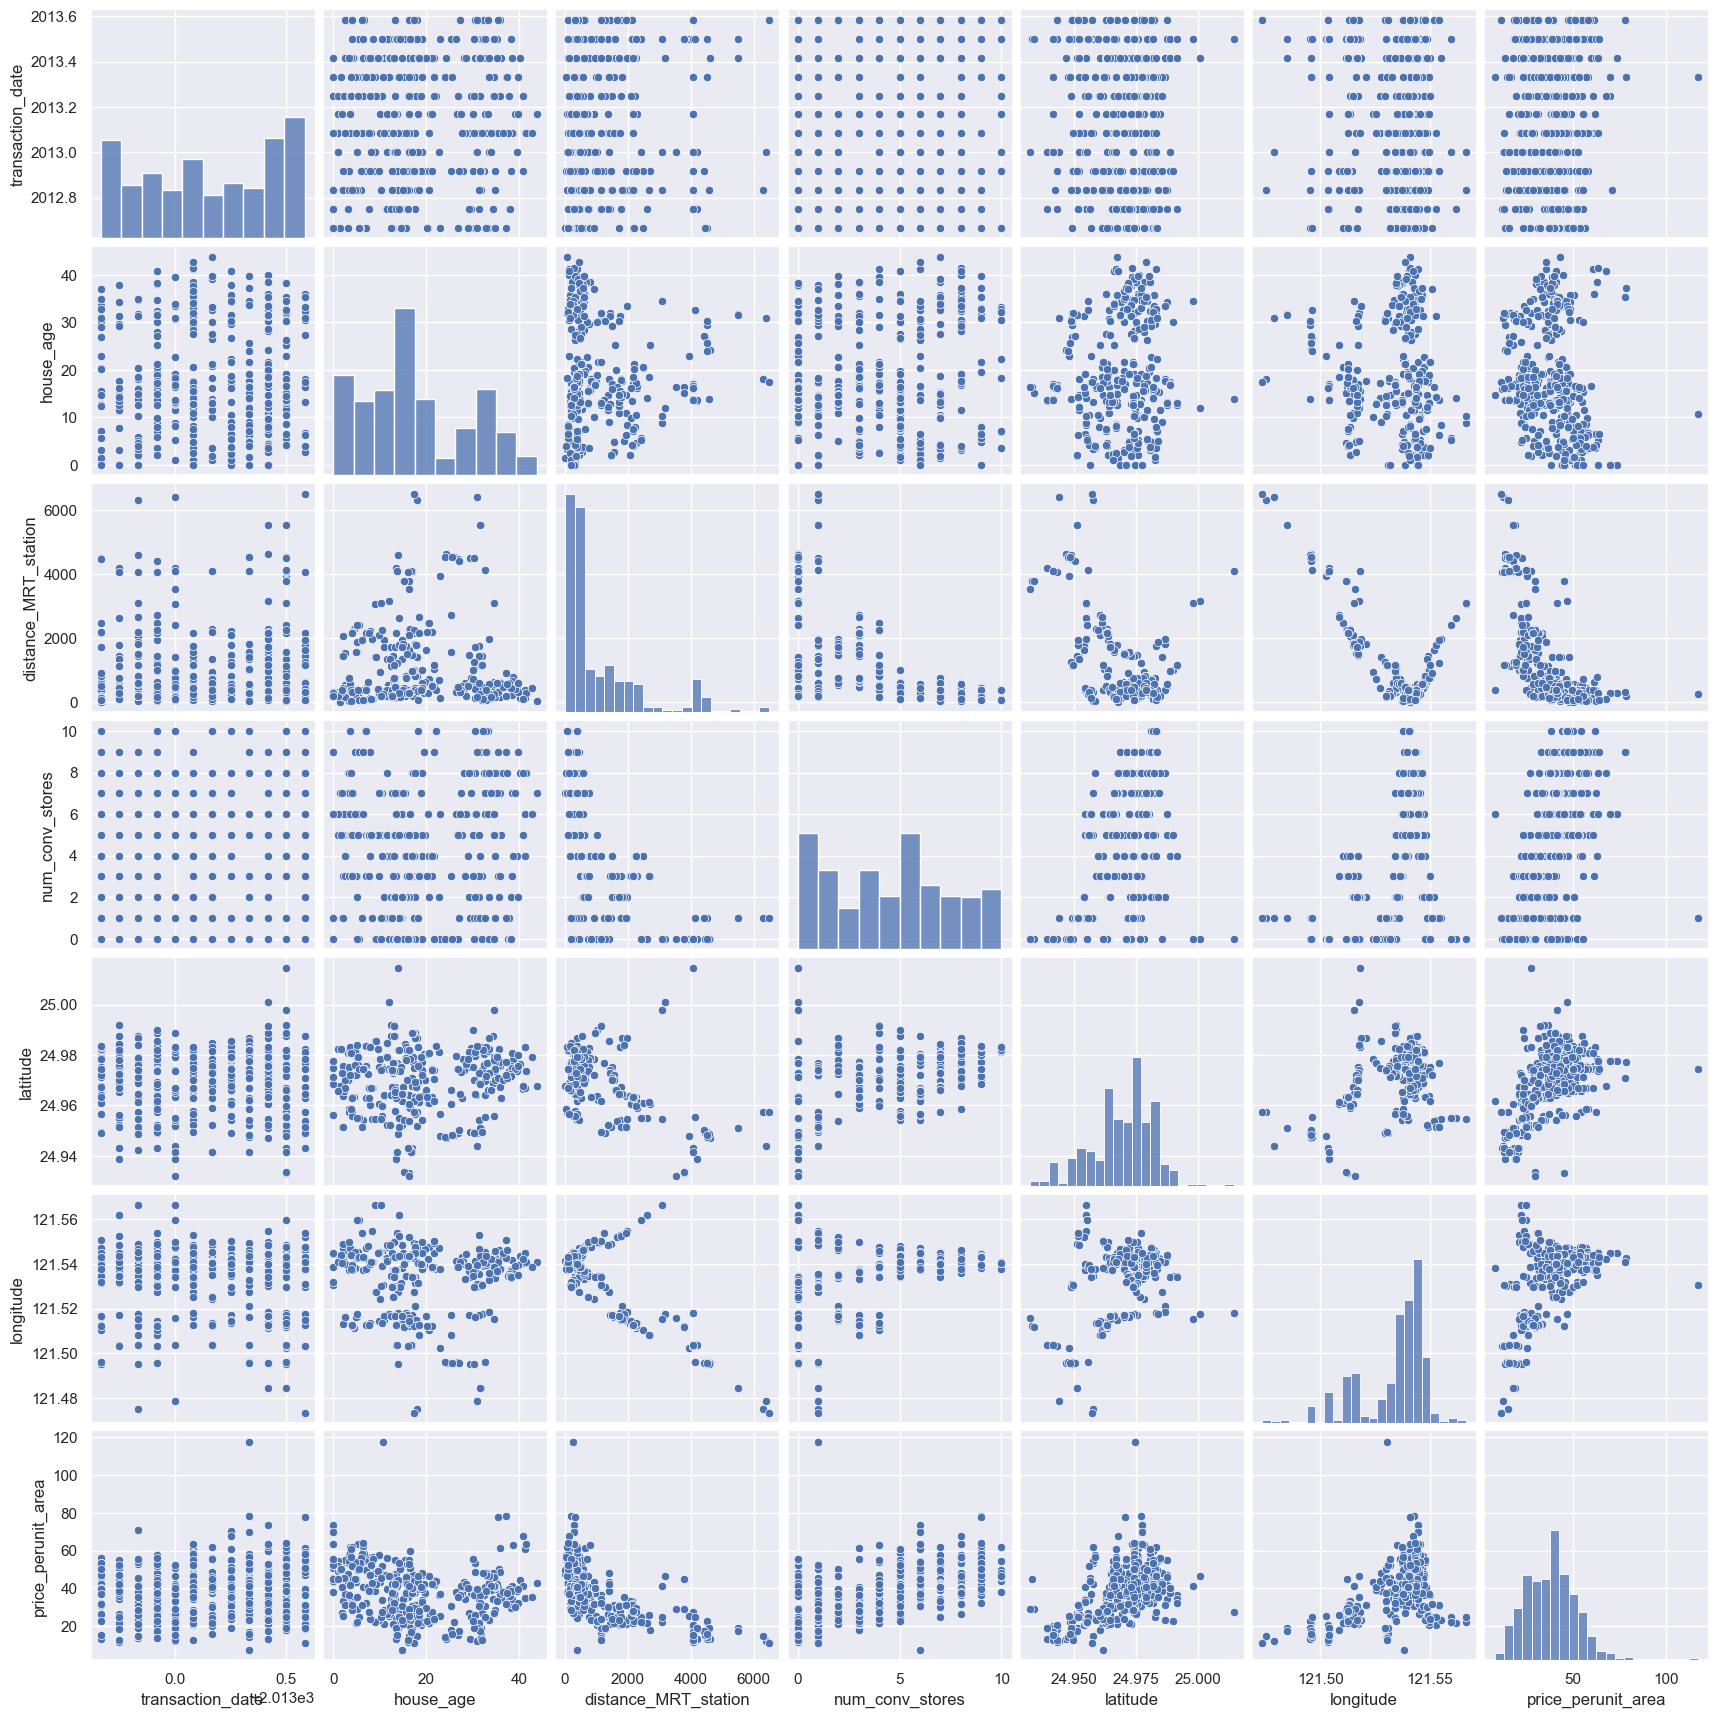

In [412]:
# this gives us a better understanding on 
# the data we are analysing as we can visualise 
# its relationship with another
sea.pairplot(RealEstate)

HEATMAP BELOW:

The correlation relationship is examined;
this shows that there is poor correlation of
transaction date throughout the model, 
while others show better relations

Multicollinearity is not visible as
a large issue in the dataset and
therefore will not harm the model
(usually a 0.7 to 0.8 correlation 
in multicollinearity is when action
needs to be taken place)

<Axes: >

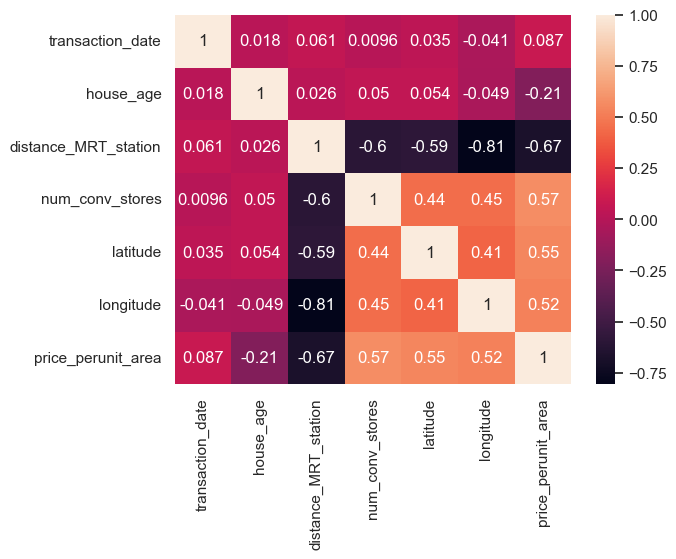

In [410]:
sea.heatmap(RealEstate.corr(), annot=True)#, cmap="viridis")

REGRESSION GRAPHS BELOW:

This further explores the dataset and correlations.

Here we confirm that transaction_date has
little to no effect on the output, 
however, we shouldnt remove it as it still 
holds significance and influences the outcome

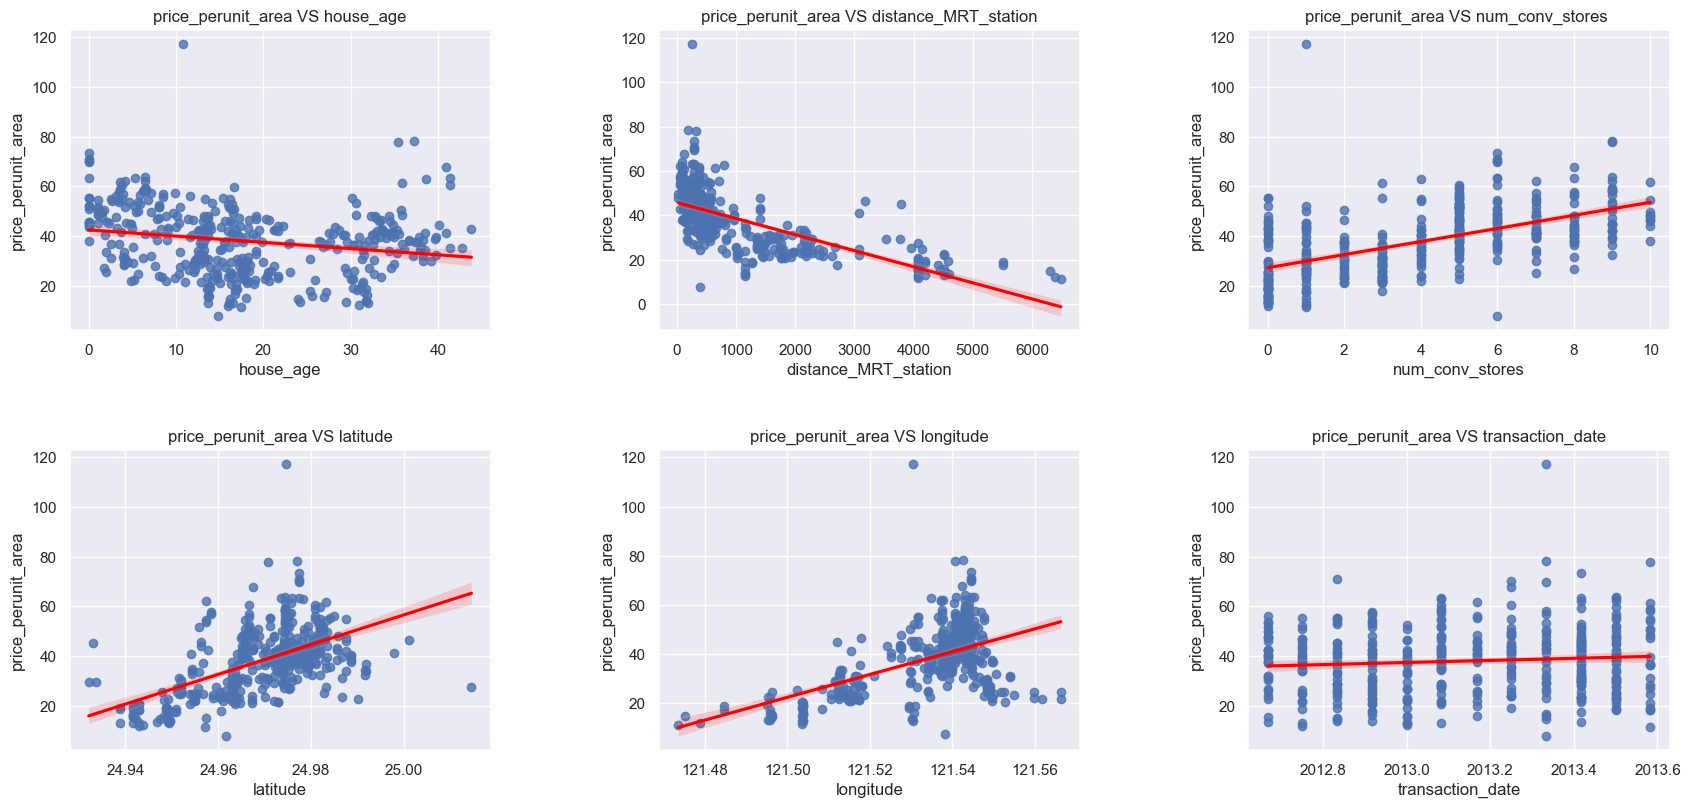

In [411]:
fig, ax = plt.subplots(2, 3, figsize=(20,9))
ax = ax.flatten()

sea.set()

sea.regplot(x="house_age", y="price_perunit_area", data=RealEstate, line_kws={"color": "red"}, ax=ax[0])
ax[0].set_title("price_perunit_area VS house_age")

sea.regplot(x="distance_MRT_station", y="price_perunit_area", data=RealEstate, line_kws={"color": "red"}, ax=ax[1])
ax[1].set_title("price_perunit_area VS distance_MRT_station")

sea.regplot(x="num_conv_stores", y="price_perunit_area", data=RealEstate, line_kws={"color": "red"}, ax=ax[2])
ax[2].set_title("price_perunit_area VS num_conv_stores ")

sea.regplot(x="latitude", y="price_perunit_area", data=RealEstate, line_kws={"color": "red"}, ax=ax[3])
ax[3].set_title("price_perunit_area VS latitude")

sea.regplot(x="longitude", y="price_perunit_area", data=RealEstate, line_kws={"color": "red"}, ax=ax[4])
ax[4].set_title("price_perunit_area VS longitude")

sea.regplot(x="transaction_date", y="price_perunit_area", data=RealEstate, line_kws={"color": "red"}, ax=ax[5])
ax[5].set_title("price_perunit_area VS transaction_date")

# adjusts plots for neatness
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [511]:
# we now split the data and prepare it for the training stage
X = RealEstate[['transaction_date','house_age','distance_MRT_station','num_conv_stores','latitude','longitude']]

y = RealEstate['price_perunit_area']

In [512]:
# the x values
X

,transaction_date,house_age,distance_MRT_station,num_conv_stores,latitude,longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067


In [513]:
# the y values
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: price_perunit_area, Length: 414, dtype: float64

In [514]:
# we remind ourselves on the shape of the data 
# so we can choose a good splitting ratio
print("X=",X.shape,"\ny=", y.shape)

X= (414, 6) 
y= (414,)


TRAINING AND TESTING BELOW:

We now train and test data
0.3 was chosen as 30% is a viable testing size

A random state of 101 was chosen so the numbers remain stagnant 
therefore making it possible to test and experiment the
model with different train and test splits

In [515]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [516]:
# displays the training values for X
X_train

,transaction_date,house_age,distance_MRT_station,num_conv_stores,latitude,longitude
266,2013.250,17.8,1783.18000,3,24.96731,121.51486
298,2013.333,16.7,4082.01500,0,24.94155,121.50381
274,2013.167,27.5,394.01730,7,24.97305,121.53994
355,2013.250,3.8,383.86240,5,24.98085,121.54391
321,2012.917,16.9,964.74960,4,24.98872,121.53411
...,...,...,...,...,...,...
63,2013.583,2.6,533.47620,4,24.97445,121.54765
326,2013.500,4.1,56.47425,7,24.95744,121.53711
337,2012.833,31.3,600.86040,5,24.96871,121.54651
11,2013.333,6.3,90.45606,9,24.97433,121.54310


In [517]:
# displays the training values for Y
y_train

266    23.7
298    16.7
274    41.0
355    60.7
321    37.7
       ... 
63     55.0
326    62.1
337    30.9
11     58.1
351    28.6
Name: price_perunit_area, Length: 289, dtype: float64

In [518]:
# displays the testing values for X
X_test

,transaction_date,house_age,distance_MRT_station,num_conv_stores,latitude,longitude
176,2012.833,13.9,4573.7790,0,24.94867,121.49507
347,2013.583,17.4,6488.0210,1,24.95719,121.47353
307,2012.833,10.3,3079.8900,0,24.95460,121.56627
299,2013.167,33.2,121.7262,10,24.98178,121.54059
391,2013.583,6.2,1939.7490,1,24.95155,121.55387
...,...,...,...,...,...,...
16,2013.250,0.0,292.9978,6,24.97744,121.54458
31,2012.750,29.6,769.4034,7,24.98281,121.53408
36,2012.917,14.7,1935.0090,2,24.96386,121.51458
41,2013.500,16.8,4066.5870,0,24.94297,121.50342


In [519]:
# displays the testing values for Y
y_test

176    19.2
347    11.2
307    24.7
299    46.1
391    31.3
       ... 
16     70.1
31     25.0
36     22.9
41     18.2
24     38.8
Name: price_perunit_area, Length: 125, dtype: float64

In [520]:
# displays the shapes of the split to
# show how fair the data was split
print("X_train=",X_train.shape,"\ny_train=", y_train.shape, "\nX_test=",X_test.shape,"\ny_test=", y_test.shape)

X_train= (289, 6) 
y_train= (289,) 
X_test= (125, 6) 
y_test= (125,)


In [521]:
# multiple linear regerssion will be used for this model
model = LinearRegression()

In [522]:
# the data is then fitted into the model
model.fit(X_train, y_train)

LinearRegression()

In [523]:
# displays coefficients of the model
model.coef_

array([ 4.83926101e+00, -2.74749120e-01, -4.18860818e-03,  1.18123112e+00,
        2.42384317e+02,  2.33991349e+01])

In [524]:
# dataframe coefficients
pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])

,Coefficients
transaction_date,4.839261
house_age,-0.274749
distance_MRT_station,-0.004189
num_conv_stores,1.181231
latitude,242.384317
longitude,23.399135


In [525]:
# The values are then predicted
y_pred = model.predict(X_test)
y_pred

array([12.63830383, 10.0304461 , 22.98807375, 48.50264837, 32.67140451,
       37.82572669, 36.09178068, 41.05953639, 47.84830793, 40.4574746 ,
       45.0361603 , 32.86533457, 40.48623576, 36.48827849, 44.30595729,
       46.59668235, 38.42798244, 44.26307337, 48.81959723, 45.50409246,
       42.23260833, 54.6526397 , 48.07373298, 37.48194231, 33.57091525,
       48.26293154, 40.23479801, 50.42675437, 47.22333423, 38.99458517,
       48.11033139, 40.47035604, 45.61060308, 43.98441528, 46.54336092,
        8.18725886, 38.08375879, 39.82608171,  8.5339677 , 55.72740213,
       32.17950939, 49.72698264, 24.85604948, 47.64473233, 41.23026871,
       51.17703175, 42.04716292, 37.32689765, 44.24427856, 36.27028988,
       47.55408451, 34.74054504, 43.53329366, 15.95586215, 38.29001222,
       48.93912385, 44.69790471, 44.91934627, 45.33972278, 41.33035787,
       34.39899173, 44.02303164, 41.99940522, 43.9553153 , 53.61420366,
       44.24994361, 24.68926603, 47.06140631, 31.22031534, 40.49

BELOW:

Absolute Error refers to the magnitude of difference 
between the prediction of an observation and the 
true value of that observation.

The Mean Squared Error measures how close a 
regression line is to a set of data points.

Root mean square error is used for measuring
the quality of predictions.

"MSE should be minimized to get a more accurate model. 
An MSE of 0 would mean that the model is overfitting 
the data, i.e. the model is too complex and will have 
poor performance. An MSE of 1 would mean that the model 
is underfitting , i.e. the model is too simple and will 
predict poorly. A model should strike a balance 
between overfitting and underfitting", Unite (2023).

Reference:

Medium. 2023. Regression Model Evaluation Metrics. 4 September 2020. [Online]. Available at: https://medium.com/@lightwrx818/regression-model-evaluation-metrics-7eb82fcfec94#:~:text=MSE%20should%20be%20minimized%20to,simple%20and%20will%20predict%20poorly [Accessed 25 April 2023].

In [527]:
# Formula for Mean Absolute Error
MAE= metrics.mean_absolute_error(y_test, y_pred)

#Formula for Mean Squared Error
MSE=metrics.mean_squared_error(y_test, y_pred)

# Formula for Root Mean Squared Error
RMSE= np.sqrt(MSE)

print("MAE  = ", MAE, "\nMSE  = ", MSE, "\nRMSE = ", RMSE)

MAE  =  5.392293684756804 
MSE  =  46.211797834938395 
RMSE =  6.797925995106036
